### Student Information
Name: 何名居

Student ID: 111065501

GitHub ID: fjrialdnc0615@gmail.com

Kaggle name: 吳冠緯我婆(fjrialdnc0615)

Kaggle private scoreboard snapshot:

[Snapshot](rank_of_private_board.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

## Part 1

Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master).

In [1]:
import pandas as pd

### loading training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### loading testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


top 30 training set word frequency:
 ['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'all' 'like'
 'are' 'your' 'was' 'when' 'if']



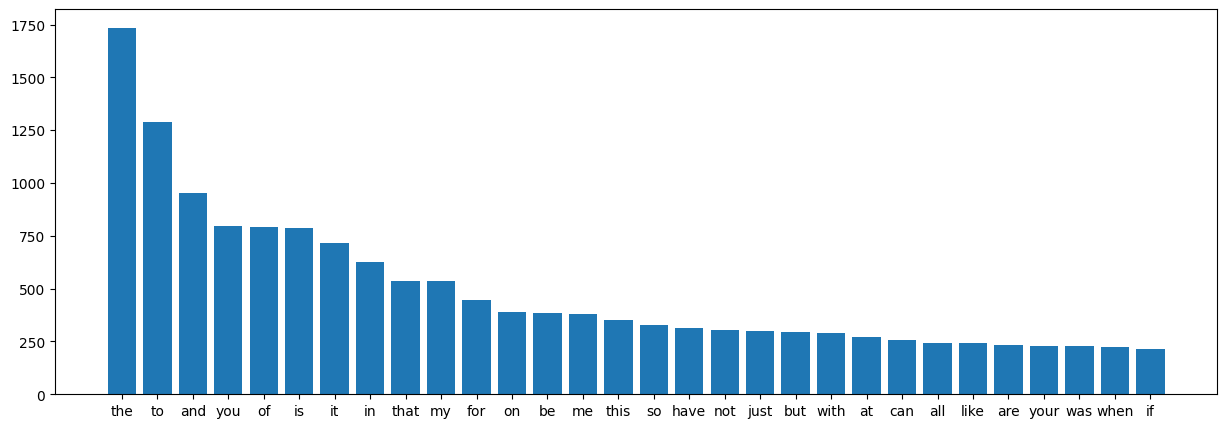

In [2]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
train_count_vect30 = CountVectorizer(max_features=30)
train_text = train_count_vect30.fit_transform(train_df["text"])

word_frequency = [sum(i) for i in train_text.toarray().T]
word_index = sorted(range(len(word_frequency)),reverse=True, key=lambda k: word_frequency[k])
word_rank = train_count_vect30.get_feature_names_out()[word_index]

plt.figure(figsize=(15,5))
plt.bar(word_rank,sorted(word_frequency,reverse=True))
print(f"top 30 training set word frequency:\n {word_rank}\n")

top 30 training set word frequency:
 ['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'so' 'was' 'can' 'all' 'at' 'have' 'are' 'just' 'with' 'but' 'get'
 'like' 'not' 'this' 'up' 'your']



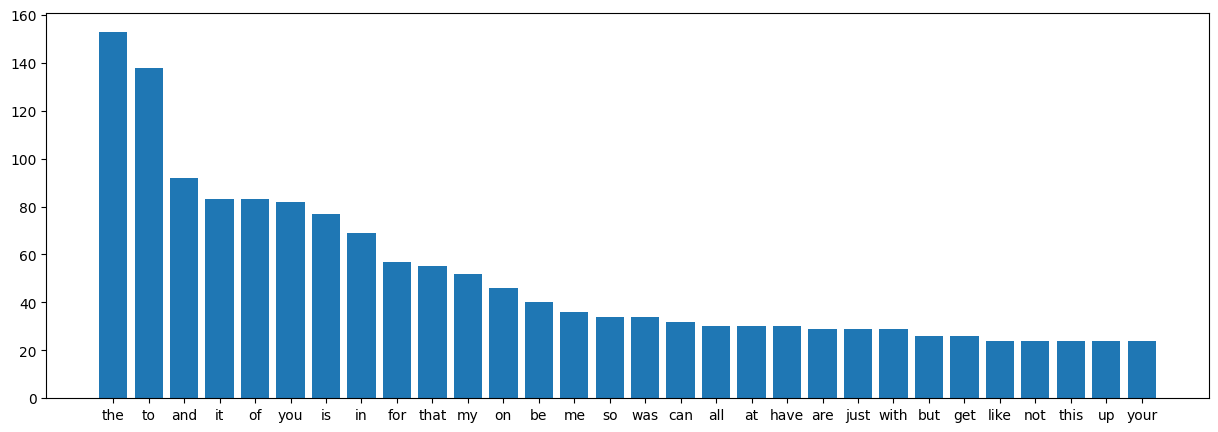

In [3]:
test_count_vect30 = CountVectorizer(max_features=30)
test_text = test_count_vect30.fit_transform(test_df["text"])

word_frequency = [sum(i) for i in test_text.toarray().T]
word_index = sorted(range(len(word_frequency)),reverse=True, key=lambda k: word_frequency[k])
word_rank = test_count_vect30.get_feature_names_out()[word_index]

plt.figure(figsize=(15,5))
plt.bar(word_rank,sorted(word_frequency,reverse=True))
print(f"top 30 training set word frequency:\n {word_rank}\n")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
# build analyzers (bag-of-words)
TF_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TF_1000.fit(train_df['text'])

train_data_BOW_features_1000 = TF_1000.transform(train_df['text'])

## check dimension
train_data_BOW_features_1000.toarray()
feature_names_1000 = TF_1000.get_feature_names()
feature_names_1000[100:110]

d:\anaconda\envs\py39\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\anaconda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [4]:
# Answer here
print(
"""
we can find some patterns in the confusion matrix:
first, confusion matrix shows the precision and recall so that we can find out which label has been misclassified or
which label is similar to the other label so as to evaluate your prediction with insight of distribution.

second, we can see there are 57 predictions of anger and 27 false positives and 29 false negatives.
In terms of false positives in anger we can see 18 fear labels are misclassified to angers so that
we can assume that anger and fear share some characteristic and make the model hard to classify correctly.
Second, in terms of sadness, we can find out 13 fear labels misclassified to sadness but 9 sadness labels
are classified to fear. In this way, we can say that fear sometimes will be regarded as sadness but sadness
would not misclassify to fear. The pattern is not reversible.
"""
)


we can find some patterns in the confusion matrix:
first, confusion matrix shows the precision and recall so that we can find out which label has been misclassified or
which label is similar to the other label so as to evaluate your prediction with insight of distribution.

second, we can see there are 57 predictions of anger and 27 false positives and 29 false negatives.
In terms of false positives in anger we can see 18 fear labels are misclassified to angers so that
we can assume that anger and fear share some characteristic and make the model hard to classify correctly.
Second, in terms of sadness, we can find out 13 fear labels misclassified to sadness but 9 sadness labels
are classified to fear. In this way, we can say that fear sometimes will be regarded as sadness but sadness
would not misclassify to fear. The pattern is not reversible.



---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [6]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

d:\anaconda\envs\py39\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [7]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [10]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


#cmap=sns.cubehelix_palette: the bar near the confusion matrix to show the meaning of color
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

training accuracy: 0.76
testing accuracy: 0.65
              precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



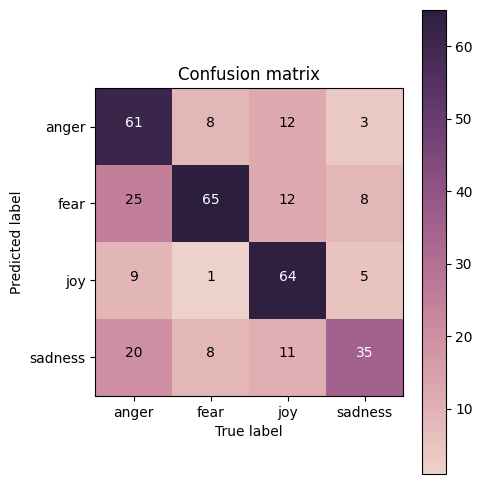

In [13]:
# Answer here
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
## accuracy
from sklearn.metrics import accuracy_score
## precision, recall, f1-score,
from sklearn.metrics import classification_report
## check by confusion matrix
from sklearn.metrics import confusion_matrix

NB = GaussianNB()
NB.fit(X_train.toarray(), y_train)
## predict!
y_train_pred = NB.predict(X_train.toarray())
y_test_pred = NB.predict(X_test.toarray())

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))
my_tags = ['anger', 'fear', 'joy', 'sadness']
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [14]:
# Answer here
print(
    '''
    the result shows that random forest performs better than naive bayes(0.68 > 0.65),
    the reason is that random forest use bootstraping and bagging algorithm to consturct 
    multiple trees and vote for the objective result.

    On the other hand, naive bayes will be good if the conditional independence is useful to classify the labels.
    Despite the fact that naive bayes has smaller model size, easy to implement and and requiring less training time,
    random forest can have better result for its algorithm is more suitable in this scenerio.
    ''')


    the result shows that random forest performs better than naive bayes(0.68 > 0.65),
    the reason is that random forest use bootstraping and bagging algorithm to consturct 
    multiple trees and vote for the objective result.

    On the other hand, naive bayes will be good if the conditional independence is useful to classify the labels.
    Despite the fact that naive bayes has smaller model size, easy to implement and and requiring less training time,
    random forest can have better result for its algorithm is more suitable in this scenerio.
    


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


In [21]:
import tensorflow.keras as keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [22]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

#using labelencoder to do one hot encoding in y labe(from 1d to 4d)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1535       fear
2847    sadness
983        fear
2855    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [23]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [ ]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 100
batch_size = 256

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/100


d:\anaconda\envs\py39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


15/15 [==============================] - 1s 12ms/step - loss: 1.3755 - accuracy: 0.2917 - val_loss: 1.3450 - val_accuracy: 0.3256
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.3172 - accuracy: 0.3460 - val_loss: 1.3222 - val_accuracy: 0.3718
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2590 - accuracy: 0.4869 - val_loss: 1.2839 - val_accuracy: 0.4553
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1714 - accuracy: 0.5632 - val_loss: 1.2148 - val_accuracy: 0.5216
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0393 - accuracy: 0.6748 - val_loss: 1.1186 - val_accuracy: 0.6110
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8742 - accuracy: 0.7415 - val_loss: 1.0128 - val_accuracy: 0.6282
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7128 - accuracy: 0.7863 - val_loss: 0.9249 - val_accuracy: 0.6715
Epoch 8/100
15/15 [=====

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[6.3525355e-01, 1.0257675e-03, 3.6264354e-01, 1.0771722e-03],
       [1.7643047e-03, 9.7010669e-04, 2.9926564e-06, 9.9726260e-01],
       [1.2036124e-06, 9.9990749e-01, 8.9006826e-05, 2.2529498e-06],
       [4.8003456e-01, 5.0107753e-01, 1.1799213e-02, 7.0886835e-03],
       [8.1745071e-08, 9.9999988e-01, 2.2389242e-08, 2.1486359e-08]],
      dtype=float32)

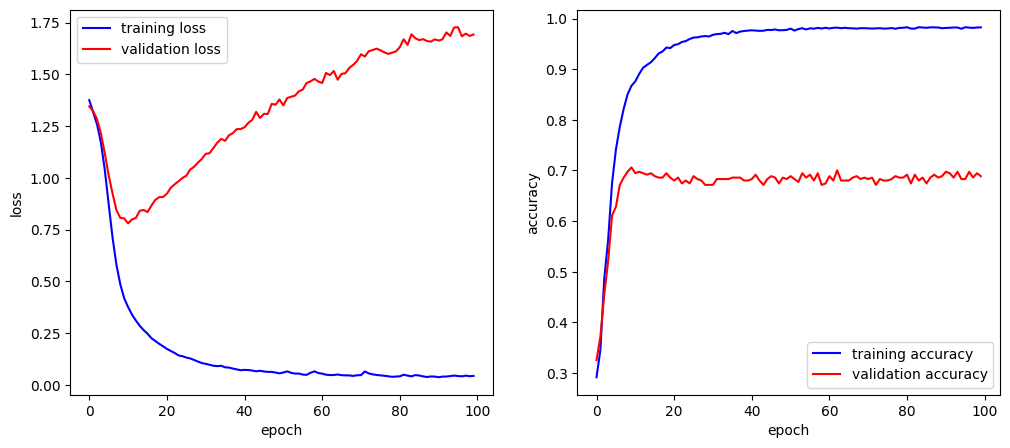


we can see from the left plot(loss) first:
after epoch 12, the validation loss is growing,
so it results in overfitting(training loss decrease while validation loss increase).

Besides, we can find out the same result from the right plot(accuracy):
after the epoch between 10~15, we can find out the accuracy in validation set is decreasing,
which is not optimal if we want to make the model improve from training.

Therefore, with these two plots we can add earlystopping function to prevent the model from overfitting,
when the loss of training in each epoch is not increasing, we can set a threshold and make the model training
interrupt before the model is suffering from the overfitting. 



In [ ]:
# Answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(training_log["loss"],color="b",label="training loss")
plt.plot(training_log["val_loss"],color="r",label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(122)
plt.plot(training_log["accuracy"],color="b",label="training accuracy")
plt.plot(training_log["val_accuracy"],color="r",label="validation accuracy")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

print('''
we can see from the left plot(loss) first:
after epoch 12, the validation loss is growing,
so it results in overfitting(training loss decrease while validation loss increase).

Besides, we can find out the same result from the right plot(accuracy):
after the epoch between 10~15, we can find out the accuracy in validation set is decreasing,
which is not optimal if we want to make the model improve from training.

Therefore, with these two plots we can add earlystopping function to prevent the model from overfitting,
when the loss of training in each epoch is not increasing, we can set a threshold and make the model training
interrupt before the model is suffering from the overfitting. 
''')



---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


print("we can use tokenizer to make a dictionary to replace +the word with an index")
tok = Tokenizer()
tok.fit_on_texts(pd.concat([train_df,test_df],ignore_index=True)['text'])
vocab_size = len(tok.word_index)+1
print("size of the dictionary:",vocab_size)

print("\n\nencode the text in sentence with index in our dictionary:")
train_encoded_phrase = tok.texts_to_sequences(train_df['text'])
test_encoded_phrase = tok.texts_to_sequences(test_df['text'])
print("example sentence before indexing:",train_df["text"].values.tolist()[0])
print("example sentence after indexing:",train_encoded_phrase[0])

max_len = 0
#get max length in our dataset in terms of sentence.
for sent in train_encoded_phrase + test_encoded_phrase:
    if max_len < len(sent):
        max_len=len(sent)

print("\n\nthe model can only accept fixed length input, so we need to do padding to make all the sentence in the same length:")
X_train = pad_sequences(train_encoded_phrase, maxlen=max_len, dtype='int32', padding='pre', truncating='pre', value=0.0)
X_test = pad_sequences(test_encoded_phrase, maxlen=max_len, dtype='int32', padding='pre', truncating='pre', value=0.0)
print("example data after padding:",X_train[0])



we can use tokenizer to make a dictionary to replace +the word with an index
size of the dictionary: 11560


encode the text in sentence with index in our dictionary:
example sentence before indexing: Don't let the behavior of others destroy ur inner peace.' -Dalai Lama @OWNTV #healing #depression #anxiety #intuition #meditation #book
example sentence after indexing: [35, 142, 1, 1132, 6, 710, 1133, 341, 1002, 581, 63, 1999, 2000, 2001, 1563, 172, 160, 2002, 1304, 501]


the model can only accept fixed length input, so we need to do padding to make all the sentence in the same length:
example data after padding: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   35  142    1 1132    6  710 1133  341 1002  581   63 1999 2000 2001
 1563  172  160 2002 1304  501]


In [ ]:
import numpy as np

print("then we create an embedding matrix for model to replace the index with embedding.")
word_index_tuple =  list(tok.word_index.items())
embedding_matrix = [[0 for i in range(300)]]
for index, word_tuple in enumerate(word_index_tuple):
    try:
        embedding_matrix.append(w2v_google_model.get_vector(word_tuple[0]))
    except:
        embedding_matrix.append([0 for i in range(300)])
embedding_matrix = np.array(embedding_matrix)
print("we can use index to find out every word in embedding matrix, so this is the shape of the matrix:",embedding_matrix.shape)

then we create an embedding matrix for model to replace the index with embedding.
we can use index to find out every word in embedding matrix, so this is the shape of the matrix: (11560, 300)


In [ ]:
print("then we put the train data to train the model and evaluate it with our test data:")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Embedding, LSTM, LSTM, ReLU, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_model():
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=max_len,embeddings_initializer=Constant(embedding_matrix)))
    model.add(LSTM(64,return_sequences=False))
    model.add(Flatten())
    model.add(Dense(4,activation='sigmoid')) 
    model.compile(optimizer=RMSprop(lr=1e-3),loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = get_model()
print(model.summary())

model.fit(X_train,y_train,batch_size=32,epochs=5)
pred_result = model.predict(X_test)
pred_result[:5]

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
tf.keras.backend.clear_session()
print("based on the accuracy we get from the model with embedding words, the accuracy of our model is 0.83 which is better than previous model.")

then we put the train data to train the model and evaluate it with our test data:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 300)           3468000   
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3,561,700
Trainable params: 3,561,700
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
113/113 [==============================] - 7s 8ms/step - loss: 0.4649 - accuracy:

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']


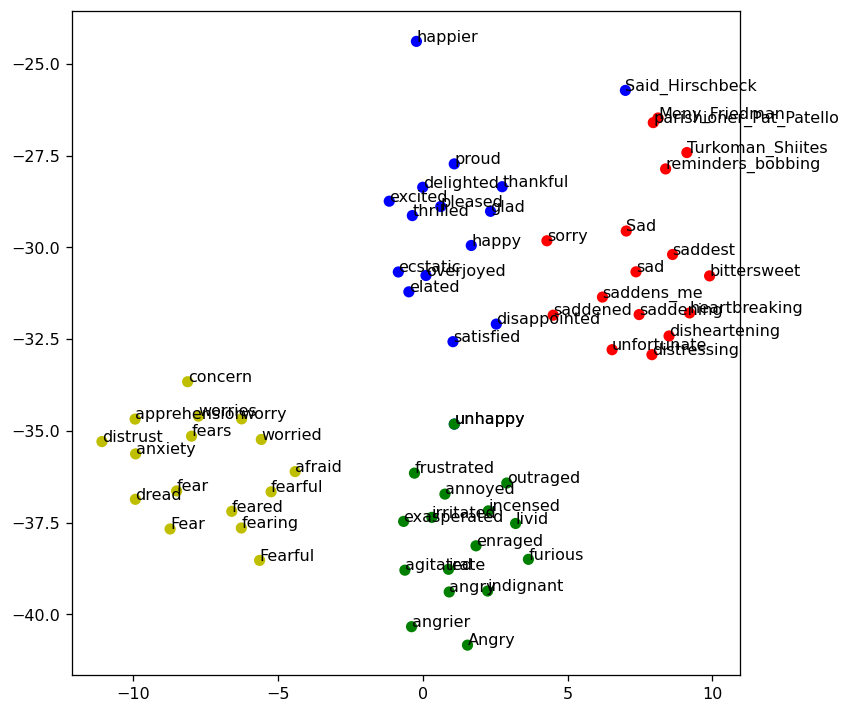

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', data_words)
print('fear_words: ', mining_words)

target_words = happy_words + angry_words + sad_words + fear_words


cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 500
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)
## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part 3 - 1 Data-Preprocessing

A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

In [ ]:
# begin with inputing data:
data_identification = pd.read_csv("data_identification.csv")
tweets_DM = pd.read_json("tweets_DM.json",lines=True)

In [ ]:
#show the structure of tweets_DM
display(tweets_DM)

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [ ]:
#check if "_index" and "_type" are all duplicate value
index_set = set(tweets_DM["_index"].values.flatten())
type_set = set(tweets_DM["_type"].values.flatten())

print(index_set)
print(type_set)
print("there is only one element in _index and _type columns, so we can drop these two columns")

{'hashtag_tweets'}
{'tweets'}
there is only one element in _index and _type columns so we can drop these two columns


In [ ]:
#find all the tags in _source column
def scan_all_the_tags(row,tag_list):
    if type(row) == type({}):
        if list(row.keys()) not in tag_list:
            tag_list.append(list(row.keys()))
        for key in row.keys():
            scan_all_the_tags(row[key],tag_list)
tag_list = []
print(tweets_DM["_source"].values.shape)
for idx, source_ in enumerate(tweets_DM["_source"].values):
    scan_all_the_tags(source_,tag_list)
print(tag_list)

(1867535,)
[['tweet'], ['hashtags', 'tweet_id', 'text']]


In [ ]:
def extract_contents(row):
    #_index and _type columns are not useful in our dataset, so we won't store them.
    score_ = row[0]# score_
    _source = row[2]# _source
    
    tweet_id = _source["tweet"]["tweet_id"]
    hash_tags = _source["tweet"]["hashtags"]
    text = _source["tweet"]["text"]

    return [tweet_id, hash_tags, text, score_]


tweets_arr = tweets_DM.values

process_list = [] 
for row in tweets_arr:
    new_row = extract_contents(row)
    process_list.append(new_row)

tweets_df = pd.DataFrame(process_list, columns=["tweet_id", "hash_tags", "text", "score_"])

In [ ]:
#split tweet_id to train and test dataset
data_identification = pd.read_csv("data_identification.csv")
data_identification.shape
train_tid_arr = data_identification[data_identification["identification"] == "train"][["tweet_id"]].values.flatten()
test_tid_arr = data_identification[data_identification["identification"] == "test"][["tweet_id"]].values.flatten()
print("len of train twitter id:",train_tid_arr.shape[0])
print("len of test twitter id:",test_tid_arr.shape[0])

emotion_df = pd.read_csv("emotion.csv")
display(emotion_df)
emotion_df.shape

training_set = pd.merge(left=tweets_df,right=emotion_df,on="tweet_id")
testing_set = tweets_df[tweets_df["tweet_id"].isin(test_tid_arr)]

print("shape of training data: ",training_set.shape)
display("info of training data: ",training_set)

print("shape of testing data: ",testing_set.shape)
display("info of testing data: ", testing_set)

training_set.to_csv("trainingset_woTagmerge.csv",index=False)
testing_set.to_csv("testingset_woTagmerge.csv",index=False)

len of train twitter id: 1455563
len of test twitter id: 411972


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


shape of training data:  (1455563, 5)


'info of training data: '

,tweet_id,hash_tags,text,score_,emotion
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",391,anticipation
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",433,sadness
2,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,376,fear
3,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,120,joy
4,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,1021,anticipation
...,...,...,...,...,...
1455558,0x321566,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,94,joy
1455559,0x38959e,[],In every circumtance I'd like to be thankful t...,627,joy
1455560,0x2cbca6,[blessyou],there's currently two girls walking around the...,274,joy
1455561,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",840,joy


shape of testing data:  (411972, 4)


'info of testing data: '

,tweet_id,hash_tags,text,score_
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",232
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",989
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,66
30,0x2939d5,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",104
33,0x26289a,[],"In these tough times, who do YOU turn to as yo...",310
...,...,...,...,...
1867525,0x2913b4,[],"""For this is the message that ye heard from th...",602
1867529,0x2a980e,[],"""There is a lad here, which hath five barley l...",598
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,827
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...,368


In [ ]:
#text merge with hash_tags dataset
def merge_tag_with_text(df,name):
    
    def text_add_tags(row):
        hash_tags = row[1]
        text = row[2]
        for tag in hash_tags:
            text+= " "+tag
        return text


    display(df["hash_tags"])

    arr = df.values
    text_wTags_list = [text_add_tags(row) for row in arr]
    display(df["text"].iloc[:5].values.tolist())
    df["text_wTags"] = text_wTags_list
    display(df["text_wTags"].iloc[:5].values.tolist())
    if name=="training_set":
        df[["text_wTags","emotion"]].to_csv(f"{name}_wTags.csv",index=False)
    else: 
        df[["text_wTags"]].to_csv(f"{name}_wTags.csv",index=False)


merge_tag_with_text(training_set,"training_set")
merge_tag_with_text(testing_set,"testing_set")

0                             [Snapchat]
1          [freepress, TrumpLegacy, CNN]
2                                     []
3              [authentic, LaughOutLoud]
4                                     []
                       ...              
1455558                [NoWonder, Happy]
1455559                               []
1455560                       [blessyou]
1455561                               []
1455562                    [Sundayvibes]
Name: hash_tags, Length: 1455563, dtype: object

['People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>',
 '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN',
 'Now ISSA is stalking Tasha 😂😂😂 <LH>',
 '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!',
 'Still waiting on those supplies Liscus. <LH>']

['People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH> Snapchat',
 '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN freepress TrumpLegacy CNN',
 'Now ISSA is stalking Tasha 😂😂😂 <LH>',
 '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!! authentic LaughOutLoud',
 'Still waiting on those supplies Liscus. <LH>']

2                               [bibleverse]
4                                         []
9          [materialism, money, possessions]
30                      [GodsPlan, GodsWork]
33                                        []
                         ...                
1867525                                   []
1867529                                   []
1867530      [mixedfeeling, butimTHATperson]
1867531                                   []
1867532                                   []
Name: hash_tags, Length: 411972, dtype: object

['Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>',
 '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>',
 'When do you have enough ? When are you satisfied ? Is you goal really all about money ?  #materialism #money #possessions <LH>',
 'God woke you up, now chase the day #GodsPlan #GodsWork <LH>',
 'In these tough times, who do YOU turn to as your symbol of hope? <LH>']

d:\anaconda\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH> bibleverse',
 '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>',
 'When do you have enough ? When are you satisfied ? Is you goal really all about money ?  #materialism #money #possessions <LH> materialism money possessions',
 'God woke you up, now chase the day #GodsPlan #GodsWork <LH> GodsPlan GodsWork',
 'In these tough times, who do YOU turn to as your symbol of hope? <LH>']

## Part 3 - 2: Model-Training and Evaluation


In [ ]:
import os
# select GPU. Note that this should be set before you load tensorflow or pytorch.
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
import torch
# Check if any GPU is used
torch.cuda.is_available()

True

In [ ]:
# [ TODO ] load the data using the load_dataset function
from datasets import load_dataset
dataset = load_dataset("testing_model")
print(dataset)

Using custom data configuration testing_model-90548c37d592193e
Reusing dataset csv (C:\Users\a1381\.cache\huggingface\datasets\csv\testing_model-90548c37d592193e\0.0.0\652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
100%|██████████| 1/1 [00:00<00:00, 100.02it/s]

DatasetDict({
    train: Dataset({
        features: ['text_wTags', 'emotion'],
        num_rows: 1455563
    })
})


In [ ]:
#load the tokenizer using RobertaTokenizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")


#### Label processing

Our labels also need to be processed, so let's do that next.

For this tutorial, we'll use the OneHotEncoder provided by scikit-learn.

For now, just declare a new encoder and use `fit` to learn the data. Hint: you should still end up with 8 labels.

In [ ]:
# Declare a new encoder and let it learn from the dataset
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder()
level_data = np.array(dataset["train"]["emotion"]).reshape(-1,1)
print(level_data)
encoder.fit(level_data)

[['anticipation']
 ['sadness']
 ['fear']
 ...
 ['joy']
 ['joy']
 ['joy']]


OneHotEncoder()

In [ ]:
# check if we have 8 labels
LABEL_COUNT = len(encoder.categories_[0])
print(LABEL_COUNT)

8


#### Process the data

To make things easier, we can write a function to process our dataset in batches. 

In [ ]:
def preprocess(dataslice):
    """ Input: a batch of your dataset
        Example: { 'text': [['sentence1'], ['setence2'], ...],
                   'label': ['label1', 'label2', ...] }
    """
    new_dict = {}
    text_after_tokenized = tokenizer(dataslice["text_wTags"])
    label = encoder.transform(np.array(dataslice["emotion"]).reshape(-1,1))
    new_dict["input_ids"] = text_after_tokenized["input_ids"]
    new_dict["attention_mask"] = text_after_tokenized["attention_mask"]
    new_dict["label"] = label.toarray()

    """ Output: a batch of processed dataset
        Example: { 'input_ids': ...,
                   'attention_masks': ...,
                   'label': ... }
    """
    return new_dict

In [ ]:
# map the function to the whole dataset
print(dataset)
processed_data = dataset.map(preprocess,    # your processing function
                             batched = True # Process in batches so it can be faster
                            )

print(processed_data["train"][0])

DatasetDict({
    train: Dataset({
        features: ['text_wTags', 'emotion'],
        num_rows: 1455563
    })
})


Loading cached processed dataset at C:\Users\a1381\.cache\huggingface\datasets\csv\testing_model-90548c37d592193e\0.0.0\652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a\cache-a2ed785fa5c8b996.arrow


{'text_wTags': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH> Snapchat', 'emotion': 'anticipation', 'input_ids': [0, 4763, 54, 618, 22, 4917, 162, 15, 849, 41513, 29465, 113, 531, 28, 36410, 8358, 4, 230, 4987, 313, 17220, 14, 18, 28696, 574, 725, 15698, 11477, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
# Declare a collator to do padding during traning
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
print(data_collator)

DataCollatorWithPadding(tokenizer=PreTrainedTokenizer(name_or_path='cardiffnlp/twitter-roberta-base-emotion', vocab_size=50265, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')


## Training Phase

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", num_labels=LABEL_COUNT, ignore_mismatched_sizes=True)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([4, 768]) in the checkpoint and torch.Size([8, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([8]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Split train/val data

The `Dataset` class we prepared before has a `train_test_split` method.

In [ ]:
train_processed_data = processed_data["train"]
train_val_dataset = train_processed_data.train_test_split(test_size=0.0001)

In [ ]:
print(train_val_dataset)

DatasetDict({
    train: Dataset({
        features: ['text_wTags', 'emotion', 'input_ids', 'attention_mask', 'label'],
        num_rows: 1455417
    })
    test: Dataset({
        features: ['text_wTags', 'emotion', 'input_ids', 'attention_mask', 'label'],
        num_rows: 146
    })
})


In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
OUTPUT_DIR = "./pretrained_model/"
LEARNING_RATE = 2e-5
BATCH_SIZE = 32
EPOCH = 3

training_args = TrainingArguments(
    output_dir = OUTPUT_DIR,
    learning_rate = LEARNING_RATE,
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size = BATCH_SIZE,
    num_train_epochs = EPOCH,
    save_steps=100000,
)


trainer = Trainer(
    # Function that returns the model to train. It's useful to use a function
    # instead of directly the model to make sure that we are always training
    # an untrained model from scratch.
    model=model,
    # The training arguments.
    args=training_args,
    # The training dataset.
    train_dataset=train_val_dataset["train"],
    # The evaluation dataset. We use a small subset of the validation set
    # composed of 150 samples to speed up computations...
    eval_dataset=train_val_dataset["test"],
    # Even though the training set and evaluation set are already tokenized, the
    # tokenizer is needed to pad the "input_ids" and "attention_mask" tensors
    # to the length managed by the model. It does so one batch at a time, to
    # use less memory as possible.
    tokenizer=tokenizer,
    data_collator=data_collator,
)



In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: emotion, text_wTags.
***** Running training *****
  Num examples = 1455417
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 136446
  0%|          | 500/136446 [00:51<3:46:36, 10.00it/s]

{'loss': 0.2916, 'learning_rate': 1.992671093326298e-05, 'epoch': 0.01}


  1%|          | 1002/136446 [01:39<3:30:58, 10.70it/s]

{'loss': 0.2517, 'learning_rate': 1.9853421866525953e-05, 'epoch': 0.02}


  1%|          | 1502/136446 [02:24<3:23:01, 11.08it/s]

{'loss': 0.2382, 'learning_rate': 1.978013279978893e-05, 'epoch': 0.03}


  1%|▏         | 2001/136446 [03:10<3:37:54, 10.28it/s]

{'loss': 0.2279, 'learning_rate': 1.9706843733051905e-05, 'epoch': 0.04}


  2%|▏         | 2501/136446 [03:56<3:27:54, 10.74it/s]

{'loss': 0.2199, 'learning_rate': 1.963355466631488e-05, 'epoch': 0.05}


  2%|▏         | 3001/136446 [04:41<3:21:25, 11.04it/s]

{'loss': 0.2181, 'learning_rate': 1.9560265599577856e-05, 'epoch': 0.07}


  3%|▎         | 3502/136446 [05:27<3:27:05, 10.70it/s]

{'loss': 0.2107, 'learning_rate': 1.9486976532840833e-05, 'epoch': 0.08}


  3%|▎         | 4002/136446 [06:13<3:22:34, 10.90it/s]

{'loss': 0.2101, 'learning_rate': 1.9413687466103807e-05, 'epoch': 0.09}


  3%|▎         | 4502/136446 [06:59<3:15:52, 11.23it/s]

{'loss': 0.2085, 'learning_rate': 1.9340398399366785e-05, 'epoch': 0.1}


  4%|▎         | 5002/136446 [07:44<3:33:29, 10.26it/s]

{'loss': 0.2072, 'learning_rate': 1.9267109332629762e-05, 'epoch': 0.11}


  4%|▍         | 5502/136446 [08:30<3:17:25, 11.05it/s]

{'loss': 0.2073, 'learning_rate': 1.9193820265892736e-05, 'epoch': 0.12}


  4%|▍         | 6001/136446 [09:16<3:19:50, 10.88it/s]

{'loss': 0.2068, 'learning_rate': 1.912053119915571e-05, 'epoch': 0.13}


  5%|▍         | 6501/136446 [10:01<3:20:59, 10.78it/s]

{'loss': 0.2056, 'learning_rate': 1.9047242132418688e-05, 'epoch': 0.14}


  5%|▌         | 7001/136446 [10:47<3:17:39, 10.91it/s]

{'loss': 0.2029, 'learning_rate': 1.8973953065681662e-05, 'epoch': 0.15}


  5%|▌         | 7501/136446 [11:33<3:26:56, 10.38it/s]

{'loss': 0.2015, 'learning_rate': 1.890066399894464e-05, 'epoch': 0.16}


  6%|▌         | 8001/136446 [12:19<3:22:38, 10.56it/s]

{'loss': 0.2001, 'learning_rate': 1.8827374932207613e-05, 'epoch': 0.18}


  6%|▌         | 8502/136446 [13:05<3:18:50, 10.72it/s]

{'loss': 0.2019, 'learning_rate': 1.875408586547059e-05, 'epoch': 0.19}


  7%|▋         | 9000/136446 [13:50<3:12:08, 11.05it/s]

{'loss': 0.2004, 'learning_rate': 1.8680796798733568e-05, 'epoch': 0.2}


  7%|▋         | 9502/136446 [14:36<3:17:44, 10.70it/s]

{'loss': 0.197, 'learning_rate': 1.8607507731996542e-05, 'epoch': 0.21}


  7%|▋         | 10002/136446 [15:22<3:12:40, 10.94it/s]

{'loss': 0.1994, 'learning_rate': 1.853421866525952e-05, 'epoch': 0.22}


  8%|▊         | 10502/136446 [16:08<3:09:26, 11.08it/s]

{'loss': 0.196, 'learning_rate': 1.8460929598522494e-05, 'epoch': 0.23}


  8%|▊         | 11002/136446 [16:53<3:08:12, 11.11it/s]

{'loss': 0.1973, 'learning_rate': 1.8387640531785468e-05, 'epoch': 0.24}


  8%|▊         | 11502/136446 [17:38<2:56:15, 11.81it/s]

{'loss': 0.1937, 'learning_rate': 1.8314351465048445e-05, 'epoch': 0.25}


  9%|▉         | 12001/136446 [18:24<3:14:54, 10.64it/s]

{'loss': 0.1952, 'learning_rate': 1.8241062398311423e-05, 'epoch': 0.26}


  9%|▉         | 12502/136446 [19:10<3:05:45, 11.12it/s]

{'loss': 0.1963, 'learning_rate': 1.8167773331574397e-05, 'epoch': 0.27}


 10%|▉         | 13002/136446 [19:56<3:04:53, 11.13it/s]

{'loss': 0.1959, 'learning_rate': 1.8094484264837374e-05, 'epoch': 0.29}


 10%|▉         | 13502/136446 [20:42<3:15:22, 10.49it/s]

{'loss': 0.1952, 'learning_rate': 1.8021195198100348e-05, 'epoch': 0.3}


 10%|█         | 14002/136446 [21:28<3:01:28, 11.25it/s]

{'loss': 0.1926, 'learning_rate': 1.7947906131363326e-05, 'epoch': 0.31}


 11%|█         | 14501/136446 [22:14<3:01:18, 11.21it/s]

{'loss': 0.1925, 'learning_rate': 1.78746170646263e-05, 'epoch': 0.32}


 11%|█         | 15002/136446 [23:00<3:02:48, 11.07it/s]

{'loss': 0.193, 'learning_rate': 1.7801327997889277e-05, 'epoch': 0.33}


 11%|█▏        | 15502/136446 [23:46<3:15:32, 10.31it/s]

{'loss': 0.1923, 'learning_rate': 1.772803893115225e-05, 'epoch': 0.34}


 12%|█▏        | 16002/136446 [24:31<3:25:28,  9.77it/s]

{'loss': 0.192, 'learning_rate': 1.765474986441523e-05, 'epoch': 0.35}


 12%|█▏        | 16502/136446 [25:16<2:59:58, 11.11it/s]

{'loss': 0.1925, 'learning_rate': 1.7581460797678206e-05, 'epoch': 0.36}


 12%|█▏        | 17002/136446 [26:02<3:03:01, 10.88it/s]

{'loss': 0.1896, 'learning_rate': 1.750817173094118e-05, 'epoch': 0.37}


 13%|█▎        | 17502/136446 [26:48<2:52:34, 11.49it/s]

{'loss': 0.1915, 'learning_rate': 1.7434882664204157e-05, 'epoch': 0.38}


 13%|█▎        | 18001/136446 [27:34<2:59:46, 10.98it/s]

{'loss': 0.1914, 'learning_rate': 1.736159359746713e-05, 'epoch': 0.4}


 14%|█▎        | 18501/136446 [28:20<2:56:21, 11.15it/s]

{'loss': 0.1879, 'learning_rate': 1.7288304530730105e-05, 'epoch': 0.41}


 14%|█▍        | 19002/136446 [29:05<3:02:01, 10.75it/s]

{'loss': 0.1889, 'learning_rate': 1.7215015463993083e-05, 'epoch': 0.42}


 14%|█▍        | 19502/136446 [29:51<2:55:37, 11.10it/s]

{'loss': 0.1914, 'learning_rate': 1.7141726397256057e-05, 'epoch': 0.43}


 15%|█▍        | 20002/136446 [30:36<2:52:01, 11.28it/s]

{'loss': 0.188, 'learning_rate': 1.7068437330519034e-05, 'epoch': 0.44}


 15%|█▌        | 20501/136446 [31:22<2:52:11, 11.22it/s]

{'loss': 0.1903, 'learning_rate': 1.6995148263782012e-05, 'epoch': 0.45}


 15%|█▌        | 21001/136446 [32:07<2:52:25, 11.16it/s]

{'loss': 0.1893, 'learning_rate': 1.6921859197044986e-05, 'epoch': 0.46}


 16%|█▌        | 21501/136446 [32:53<2:52:45, 11.09it/s]

{'loss': 0.1904, 'learning_rate': 1.6848570130307963e-05, 'epoch': 0.47}


 16%|█▌        | 22002/136446 [33:39<2:58:16, 10.70it/s]

{'loss': 0.1878, 'learning_rate': 1.6775281063570937e-05, 'epoch': 0.48}


 16%|█▋        | 22501/136446 [34:26<2:54:00, 10.91it/s]

{'loss': 0.187, 'learning_rate': 1.670199199683391e-05, 'epoch': 0.49}


 17%|█▋        | 23001/136446 [35:12<2:52:50, 10.94it/s]

{'loss': 0.1909, 'learning_rate': 1.662870293009689e-05, 'epoch': 0.51}


 17%|█▋        | 23501/136446 [35:58<2:56:59, 10.64it/s]

{'loss': 0.1888, 'learning_rate': 1.6555413863359866e-05, 'epoch': 0.52}


 18%|█▊        | 24001/136446 [36:44<2:58:22, 10.51it/s]

{'loss': 0.1867, 'learning_rate': 1.648212479662284e-05, 'epoch': 0.53}


 18%|█▊        | 24501/136446 [37:29<2:50:42, 10.93it/s]

{'loss': 0.1852, 'learning_rate': 1.6408835729885818e-05, 'epoch': 0.54}


 18%|█▊        | 25001/136446 [38:15<2:43:19, 11.37it/s]

{'loss': 0.1848, 'learning_rate': 1.6335546663148795e-05, 'epoch': 0.55}


 19%|█▊        | 25502/136446 [39:01<2:47:24, 11.05it/s]

{'loss': 0.1849, 'learning_rate': 1.626225759641177e-05, 'epoch': 0.56}


 19%|█▉        | 26002/136446 [39:46<2:42:14, 11.35it/s]

{'loss': 0.1877, 'learning_rate': 1.6188968529674743e-05, 'epoch': 0.57}


 19%|█▉        | 26502/136446 [40:32<2:45:14, 11.09it/s]

{'loss': 0.1863, 'learning_rate': 1.611567946293772e-05, 'epoch': 0.58}


 20%|█▉        | 27001/136446 [41:17<2:49:52, 10.74it/s]

{'loss': 0.1862, 'learning_rate': 1.6042390396200695e-05, 'epoch': 0.59}


 20%|██        | 27501/136446 [42:03<2:49:33, 10.71it/s]

{'loss': 0.1862, 'learning_rate': 1.5969101329463672e-05, 'epoch': 0.6}


 21%|██        | 28001/136446 [42:49<2:45:35, 10.91it/s]

{'loss': 0.1889, 'learning_rate': 1.589581226272665e-05, 'epoch': 0.62}


 21%|██        | 28501/136446 [43:35<2:48:48, 10.66it/s]

{'loss': 0.1838, 'learning_rate': 1.5822523195989623e-05, 'epoch': 0.63}


 21%|██▏       | 29001/136446 [44:21<2:40:49, 11.14it/s]

{'loss': 0.1836, 'learning_rate': 1.57492341292526e-05, 'epoch': 0.64}


 22%|██▏       | 29501/136446 [45:06<2:40:00, 11.14it/s]

{'loss': 0.1852, 'learning_rate': 1.5675945062515575e-05, 'epoch': 0.65}


 22%|██▏       | 30002/136446 [45:52<2:42:55, 10.89it/s]

{'loss': 0.1826, 'learning_rate': 1.5602655995778552e-05, 'epoch': 0.66}


 22%|██▏       | 30502/136446 [46:37<2:37:41, 11.20it/s]

{'loss': 0.183, 'learning_rate': 1.5529366929041526e-05, 'epoch': 0.67}


 23%|██▎       | 31002/136446 [47:23<2:38:57, 11.06it/s]

{'loss': 0.1817, 'learning_rate': 1.54560778623045e-05, 'epoch': 0.68}


 23%|██▎       | 31502/136446 [48:09<2:34:09, 11.35it/s]

{'loss': 0.1846, 'learning_rate': 1.5382788795567478e-05, 'epoch': 0.69}


 23%|██▎       | 32002/136446 [48:55<2:38:29, 10.98it/s]

{'loss': 0.1806, 'learning_rate': 1.5309499728830455e-05, 'epoch': 0.7}


 24%|██▍       | 32502/136446 [49:40<2:36:12, 11.09it/s]

{'loss': 0.1839, 'learning_rate': 1.523621066209343e-05, 'epoch': 0.71}


 24%|██▍       | 33002/136446 [50:25<2:32:33, 11.30it/s]

{'loss': 0.185, 'learning_rate': 1.5162921595356405e-05, 'epoch': 0.73}


 25%|██▍       | 33502/136446 [51:11<2:36:41, 10.95it/s]

{'loss': 0.1845, 'learning_rate': 1.5089632528619382e-05, 'epoch': 0.74}


 25%|██▍       | 34002/136446 [51:57<2:31:16, 11.29it/s]

{'loss': 0.1804, 'learning_rate': 1.5016343461882356e-05, 'epoch': 0.75}


 25%|██▌       | 34502/136446 [52:43<2:35:16, 10.94it/s]

{'loss': 0.1837, 'learning_rate': 1.4943054395145334e-05, 'epoch': 0.76}


 26%|██▌       | 35001/136446 [53:28<2:30:43, 11.22it/s]

{'loss': 0.1835, 'learning_rate': 1.486976532840831e-05, 'epoch': 0.77}


 26%|██▌       | 35501/136446 [54:15<2:35:20, 10.83it/s]

{'loss': 0.1843, 'learning_rate': 1.4796476261671284e-05, 'epoch': 0.78}


 26%|██▋       | 36002/136446 [55:01<2:28:04, 11.31it/s]

{'loss': 0.1817, 'learning_rate': 1.4723187194934261e-05, 'epoch': 0.79}


 27%|██▋       | 36502/136446 [55:46<2:20:41, 11.84it/s]

{'loss': 0.1829, 'learning_rate': 1.4649898128197237e-05, 'epoch': 0.8}


 27%|██▋       | 37001/136446 [56:34<4:17:18,  6.44it/s]

{'loss': 0.1835, 'learning_rate': 1.4576609061460213e-05, 'epoch': 0.81}


 27%|██▋       | 37502/136446 [57:20<2:36:54, 10.51it/s]

{'loss': 0.1794, 'learning_rate': 1.4503319994723188e-05, 'epoch': 0.82}


 28%|██▊       | 38002/136446 [58:06<2:29:29, 10.98it/s]

{'loss': 0.1821, 'learning_rate': 1.4430030927986166e-05, 'epoch': 0.84}


 28%|██▊       | 38502/136446 [58:51<2:26:27, 11.15it/s]

{'loss': 0.1842, 'learning_rate': 1.435674186124914e-05, 'epoch': 0.85}


 29%|██▊       | 39001/136446 [59:37<2:32:49, 10.63it/s]

{'loss': 0.1808, 'learning_rate': 1.4283452794512115e-05, 'epoch': 0.86}


 29%|██▉       | 39502/136446 [1:00:23<2:34:50, 10.43it/s]

{'loss': 0.1839, 'learning_rate': 1.4210163727775093e-05, 'epoch': 0.87}


 29%|██▉       | 40002/136446 [1:01:09<2:28:52, 10.80it/s]

{'loss': 0.1836, 'learning_rate': 1.4136874661038067e-05, 'epoch': 0.88}


 30%|██▉       | 40502/136446 [1:01:54<2:20:45, 11.36it/s]

{'loss': 0.1813, 'learning_rate': 1.4063585594301044e-05, 'epoch': 0.89}


 30%|███       | 41000/136446 [1:02:40<2:20:00, 11.36it/s]

{'loss': 0.1839, 'learning_rate': 1.399029652756402e-05, 'epoch': 0.9}


 30%|███       | 41502/136446 [1:03:25<2:26:05, 10.83it/s]

{'loss': 0.1812, 'learning_rate': 1.3917007460826994e-05, 'epoch': 0.91}


 31%|███       | 42001/136446 [1:04:11<2:24:56, 10.86it/s]

{'loss': 0.1809, 'learning_rate': 1.3843718394089972e-05, 'epoch': 0.92}


 31%|███       | 42501/136446 [1:04:57<2:37:24,  9.95it/s]

{'loss': 0.1786, 'learning_rate': 1.3770429327352947e-05, 'epoch': 0.93}


 32%|███▏      | 43001/136446 [1:05:42<2:26:10, 10.65it/s]

{'loss': 0.1814, 'learning_rate': 1.3697140260615921e-05, 'epoch': 0.95}


 32%|███▏      | 43502/136446 [1:06:28<2:40:12,  9.67it/s]

{'loss': 0.1805, 'learning_rate': 1.3623851193878899e-05, 'epoch': 0.96}


 32%|███▏      | 44002/136446 [1:07:13<2:22:39, 10.80it/s]

{'loss': 0.1822, 'learning_rate': 1.3550562127141873e-05, 'epoch': 0.97}


 33%|███▎      | 44501/136446 [1:07:59<2:14:15, 11.41it/s]

{'loss': 0.1777, 'learning_rate': 1.347727306040485e-05, 'epoch': 0.98}


 33%|███▎      | 45001/136446 [1:08:45<2:14:56, 11.29it/s]

{'loss': 0.182, 'learning_rate': 1.3403983993667826e-05, 'epoch': 0.99}


 33%|███▎      | 45501/136446 [1:09:30<2:20:59, 10.75it/s]

{'loss': 0.1819, 'learning_rate': 1.33306949269308e-05, 'epoch': 1.0}


 34%|███▎      | 46002/136446 [1:10:16<2:21:27, 10.66it/s]

{'loss': 0.1658, 'learning_rate': 1.3257405860193777e-05, 'epoch': 1.01}


 34%|███▍      | 46501/136446 [1:11:02<2:24:48, 10.35it/s]

{'loss': 0.1674, 'learning_rate': 1.3184116793456753e-05, 'epoch': 1.02}


 34%|███▍      | 47000/136446 [1:11:47<2:12:14, 11.27it/s]

{'loss': 0.1645, 'learning_rate': 1.3110827726719729e-05, 'epoch': 1.03}


 35%|███▍      | 47502/136446 [1:12:33<2:15:18, 10.96it/s]

{'loss': 0.1662, 'learning_rate': 1.3037538659982705e-05, 'epoch': 1.04}


 35%|███▌      | 48001/136446 [1:13:19<2:09:16, 11.40it/s]

{'loss': 0.1658, 'learning_rate': 1.2964249593245682e-05, 'epoch': 1.06}


 36%|███▌      | 48501/136446 [1:14:05<2:25:16, 10.09it/s]

{'loss': 0.165, 'learning_rate': 1.2890960526508656e-05, 'epoch': 1.07}


 36%|███▌      | 49001/136446 [1:14:50<2:18:51, 10.50it/s]

{'loss': 0.1672, 'learning_rate': 1.2817671459771632e-05, 'epoch': 1.08}


 36%|███▋      | 49501/136446 [1:15:36<2:12:06, 10.97it/s]

{'loss': 0.167, 'learning_rate': 1.274438239303461e-05, 'epoch': 1.09}


 37%|███▋      | 50001/136446 [1:16:22<2:06:30, 11.39it/s]

{'loss': 0.167, 'learning_rate': 1.2671093326297583e-05, 'epoch': 1.1}


 37%|███▋      | 50501/136446 [1:17:07<2:10:42, 10.96it/s]

{'loss': 0.1662, 'learning_rate': 1.259780425956056e-05, 'epoch': 1.11}


 37%|███▋      | 51001/136446 [1:17:53<2:29:10,  9.55it/s]

{'loss': 0.1651, 'learning_rate': 1.2524515192823536e-05, 'epoch': 1.12}


 38%|███▊      | 51501/136446 [1:18:39<2:13:22, 10.61it/s]

{'loss': 0.1648, 'learning_rate': 1.245122612608651e-05, 'epoch': 1.13}


 38%|███▊      | 52001/136446 [1:19:25<2:06:35, 11.12it/s]

{'loss': 0.1685, 'learning_rate': 1.2377937059349488e-05, 'epoch': 1.14}


 38%|███▊      | 52500/136446 [1:20:11<2:06:52, 11.03it/s]

{'loss': 0.166, 'learning_rate': 1.2304647992612464e-05, 'epoch': 1.15}


 39%|███▉      | 53000/136446 [1:20:57<2:16:37, 10.18it/s]

{'loss': 0.1642, 'learning_rate': 1.2231358925875438e-05, 'epoch': 1.17}


 39%|███▉      | 53500/136446 [1:21:42<2:10:35, 10.59it/s]

{'loss': 0.1653, 'learning_rate': 1.2158069859138415e-05, 'epoch': 1.18}


 40%|███▉      | 54002/136446 [1:22:28<2:06:43, 10.84it/s]

{'loss': 0.1656, 'learning_rate': 1.208478079240139e-05, 'epoch': 1.19}


 40%|███▉      | 54501/136446 [1:23:14<2:33:03,  8.92it/s]

{'loss': 0.1638, 'learning_rate': 1.2011491725664367e-05, 'epoch': 1.2}


 40%|████      | 55001/136446 [1:24:00<2:03:22, 11.00it/s]

{'loss': 0.1655, 'learning_rate': 1.1938202658927342e-05, 'epoch': 1.21}


 41%|████      | 55502/136446 [1:24:46<2:04:34, 10.83it/s]

{'loss': 0.1655, 'learning_rate': 1.1864913592190316e-05, 'epoch': 1.22}


 41%|████      | 56002/136446 [1:25:31<2:00:42, 11.11it/s]

{'loss': 0.1669, 'learning_rate': 1.1791624525453294e-05, 'epoch': 1.23}


 41%|████▏     | 56502/136446 [1:26:18<2:09:12, 10.31it/s]

{'loss': 0.1657, 'learning_rate': 1.171833545871627e-05, 'epoch': 1.24}


 42%|████▏     | 57002/136446 [1:27:03<1:50:19, 12.00it/s]

{'loss': 0.1653, 'learning_rate': 1.1645046391979245e-05, 'epoch': 1.25}


 42%|████▏     | 57502/136446 [1:27:49<1:55:32, 11.39it/s]

{'loss': 0.1679, 'learning_rate': 1.1571757325242221e-05, 'epoch': 1.26}


 43%|████▎     | 58002/136446 [1:28:34<2:01:56, 10.72it/s]

{'loss': 0.1655, 'learning_rate': 1.1498468258505198e-05, 'epoch': 1.28}


 43%|████▎     | 58500/136446 [1:29:20<1:56:06, 11.19it/s]

{'loss': 0.1652, 'learning_rate': 1.1425179191768172e-05, 'epoch': 1.29}


 43%|████▎     | 59000/136446 [1:30:06<2:02:08, 10.57it/s]

{'loss': 0.1624, 'learning_rate': 1.1351890125031148e-05, 'epoch': 1.3}


 44%|████▎     | 59502/136446 [1:30:51<1:54:45, 11.18it/s]

{'loss': 0.1662, 'learning_rate': 1.1278601058294126e-05, 'epoch': 1.31}


 44%|████▍     | 60000/136446 [1:31:36<1:53:25, 11.23it/s]

{'loss': 0.1633, 'learning_rate': 1.12053119915571e-05, 'epoch': 1.32}


 44%|████▍     | 60501/136446 [1:32:23<1:53:49, 11.12it/s]

{'loss': 0.1661, 'learning_rate': 1.1132022924820077e-05, 'epoch': 1.33}


 45%|████▍     | 61002/136446 [1:33:09<1:53:04, 11.12it/s]

{'loss': 0.1667, 'learning_rate': 1.1058733858083053e-05, 'epoch': 1.34}


 45%|████▌     | 61502/136446 [1:33:54<1:49:37, 11.39it/s]

{'loss': 0.1661, 'learning_rate': 1.0985444791346027e-05, 'epoch': 1.35}


 45%|████▌     | 62001/136446 [1:34:40<1:48:50, 11.40it/s]

{'loss': 0.167, 'learning_rate': 1.0912155724609004e-05, 'epoch': 1.36}


 46%|████▌     | 62501/136446 [1:35:25<1:57:30, 10.49it/s]

{'loss': 0.1653, 'learning_rate': 1.083886665787198e-05, 'epoch': 1.37}


 46%|████▌     | 63001/136446 [1:36:10<1:50:36, 11.07it/s]

{'loss': 0.1661, 'learning_rate': 1.0765577591134954e-05, 'epoch': 1.39}


 47%|████▋     | 63501/136446 [1:36:56<1:46:56, 11.37it/s]

{'loss': 0.1684, 'learning_rate': 1.0692288524397931e-05, 'epoch': 1.4}


 47%|████▋     | 64002/136446 [1:37:41<1:48:36, 11.12it/s]

{'loss': 0.1659, 'learning_rate': 1.0618999457660907e-05, 'epoch': 1.41}


 47%|████▋     | 64501/136446 [1:38:27<1:57:23, 10.21it/s]

{'loss': 0.1648, 'learning_rate': 1.0545710390923883e-05, 'epoch': 1.42}


 48%|████▊     | 65001/136446 [1:39:13<1:48:40, 10.96it/s]

{'loss': 0.1641, 'learning_rate': 1.0472421324186859e-05, 'epoch': 1.43}


 48%|████▊     | 65501/136446 [1:39:58<1:43:37, 11.41it/s]

{'loss': 0.1641, 'learning_rate': 1.0399132257449836e-05, 'epoch': 1.44}


 48%|████▊     | 66001/136446 [1:40:44<1:47:25, 10.93it/s]

{'loss': 0.1679, 'learning_rate': 1.032584319071281e-05, 'epoch': 1.45}


 49%|████▊     | 66501/136446 [1:41:30<1:45:43, 11.03it/s]

{'loss': 0.1655, 'learning_rate': 1.0252554123975786e-05, 'epoch': 1.46}


 49%|████▉     | 67001/136446 [1:42:15<1:42:24, 11.30it/s]

{'loss': 0.168, 'learning_rate': 1.0179265057238763e-05, 'epoch': 1.47}


 49%|████▉     | 67501/136446 [1:43:01<1:53:34, 10.12it/s]

{'loss': 0.1685, 'learning_rate': 1.0105975990501737e-05, 'epoch': 1.48}


 50%|████▉     | 68001/136446 [1:43:47<1:46:21, 10.73it/s]

{'loss': 0.1663, 'learning_rate': 1.0032686923764715e-05, 'epoch': 1.5}


 50%|█████     | 68501/136446 [1:44:33<1:45:33, 10.73it/s]

{'loss': 0.1674, 'learning_rate': 9.959397857027689e-06, 'epoch': 1.51}


 51%|█████     | 69001/136446 [1:45:19<1:39:50, 11.26it/s]

{'loss': 0.1631, 'learning_rate': 9.886108790290664e-06, 'epoch': 1.52}


 51%|█████     | 69501/136446 [1:46:05<1:49:55, 10.15it/s]

{'loss': 0.1642, 'learning_rate': 9.812819723553642e-06, 'epoch': 1.53}


 51%|█████▏    | 70002/136446 [1:46:51<1:42:54, 10.76it/s]

{'loss': 0.1641, 'learning_rate': 9.739530656816618e-06, 'epoch': 1.54}


 52%|█████▏    | 70502/136446 [1:47:36<1:41:34, 10.82it/s]

{'loss': 0.1647, 'learning_rate': 9.666241590079593e-06, 'epoch': 1.55}


 52%|█████▏    | 71001/136446 [1:48:22<1:36:40, 11.28it/s]

{'loss': 0.1657, 'learning_rate': 9.592952523342567e-06, 'epoch': 1.56}


 52%|█████▏    | 71501/136446 [1:49:08<1:37:49, 11.06it/s]

{'loss': 0.1641, 'learning_rate': 9.519663456605545e-06, 'epoch': 1.57}


 53%|█████▎    | 72002/136446 [1:49:53<1:41:19, 10.60it/s]

{'loss': 0.1646, 'learning_rate': 9.44637438986852e-06, 'epoch': 1.58}


 53%|█████▎    | 72502/136446 [1:50:39<1:36:40, 11.02it/s]

{'loss': 0.1627, 'learning_rate': 9.373085323131496e-06, 'epoch': 1.59}


 54%|█████▎    | 73001/136446 [1:51:24<1:38:29, 10.74it/s]

{'loss': 0.1658, 'learning_rate': 9.299796256394472e-06, 'epoch': 1.61}


 54%|█████▍    | 73502/136446 [1:52:09<1:37:19, 10.78it/s]

{'loss': 0.1666, 'learning_rate': 9.226507189657448e-06, 'epoch': 1.62}


 54%|█████▍    | 74001/136446 [1:52:54<1:52:09,  9.28it/s]

{'loss': 0.1656, 'learning_rate': 9.153218122920423e-06, 'epoch': 1.63}


 55%|█████▍    | 74501/136446 [1:53:40<1:42:19, 10.09it/s]

{'loss': 0.1655, 'learning_rate': 9.0799290561834e-06, 'epoch': 1.64}


 55%|█████▍    | 75002/136446 [1:54:27<1:35:04, 10.77it/s]

{'loss': 0.164, 'learning_rate': 9.006639989446375e-06, 'epoch': 1.65}


 55%|█████▌    | 75502/136446 [1:55:12<1:27:40, 11.59it/s]

{'loss': 0.1636, 'learning_rate': 8.93335092270935e-06, 'epoch': 1.66}


 56%|█████▌    | 76002/136446 [1:55:58<1:32:03, 10.94it/s]

{'loss': 0.1634, 'learning_rate': 8.860061855972328e-06, 'epoch': 1.67}


 56%|█████▌    | 76501/136446 [1:56:43<1:31:32, 10.91it/s]

{'loss': 0.1645, 'learning_rate': 8.786772789235302e-06, 'epoch': 1.68}


 56%|█████▋    | 77001/136446 [1:57:30<1:30:57, 10.89it/s]

{'loss': 0.1666, 'learning_rate': 8.713483722498278e-06, 'epoch': 1.69}


 57%|█████▋    | 77501/136446 [1:58:15<1:34:24, 10.41it/s]

{'loss': 0.167, 'learning_rate': 8.640194655761254e-06, 'epoch': 1.7}


 57%|█████▋    | 78001/136446 [1:59:01<1:33:53, 10.38it/s]

{'loss': 0.1638, 'learning_rate': 8.566905589024231e-06, 'epoch': 1.71}


 58%|█████▊    | 78500/136446 [1:59:47<1:21:17, 11.88it/s]

{'loss': 0.1623, 'learning_rate': 8.493616522287205e-06, 'epoch': 1.73}


 58%|█████▊    | 79002/136446 [2:00:33<1:24:08, 11.38it/s]

{'loss': 0.1642, 'learning_rate': 8.42032745555018e-06, 'epoch': 1.74}


 58%|█████▊    | 79501/136446 [2:01:18<1:28:28, 10.73it/s]

{'loss': 0.1631, 'learning_rate': 8.347038388813158e-06, 'epoch': 1.75}


 59%|█████▊    | 80001/136446 [2:02:04<1:23:53, 11.21it/s]

{'loss': 0.165, 'learning_rate': 8.273749322076134e-06, 'epoch': 1.76}


 59%|█████▉    | 80502/136446 [2:02:50<1:24:41, 11.01it/s]

{'loss': 0.1622, 'learning_rate': 8.20046025533911e-06, 'epoch': 1.77}


 59%|█████▉    | 81002/136446 [2:03:36<1:23:36, 11.05it/s]

{'loss': 0.164, 'learning_rate': 8.127171188602085e-06, 'epoch': 1.78}


 60%|█████▉    | 81502/136446 [2:04:22<1:23:35, 10.96it/s]

{'loss': 0.163, 'learning_rate': 8.053882121865061e-06, 'epoch': 1.79}


 60%|██████    | 82002/136446 [2:05:08<1:24:22, 10.75it/s]

{'loss': 0.1633, 'learning_rate': 7.980593055128037e-06, 'epoch': 1.8}


 60%|██████    | 82501/136446 [2:05:54<1:26:01, 10.45it/s]

{'loss': 0.1645, 'learning_rate': 7.907303988391013e-06, 'epoch': 1.81}


 61%|██████    | 83001/136446 [2:06:39<1:27:11, 10.22it/s]

{'loss': 0.1636, 'learning_rate': 7.834014921653988e-06, 'epoch': 1.82}


 61%|██████    | 83501/136446 [2:07:24<1:17:58, 11.32it/s]

{'loss': 0.1614, 'learning_rate': 7.760725854916964e-06, 'epoch': 1.84}


 62%|██████▏   | 84000/136446 [2:08:10<1:14:43, 11.70it/s]

{'loss': 0.1628, 'learning_rate': 7.68743678817994e-06, 'epoch': 1.85}


 62%|██████▏   | 84502/136446 [2:08:56<1:27:37,  9.88it/s]

{'loss': 0.1648, 'learning_rate': 7.614147721442916e-06, 'epoch': 1.86}


 62%|██████▏   | 85000/136446 [2:09:41<1:18:13, 10.96it/s]

{'loss': 0.1638, 'learning_rate': 7.540858654705891e-06, 'epoch': 1.87}


 63%|██████▎   | 85502/136446 [2:10:27<1:14:15, 11.43it/s]

{'loss': 0.1663, 'learning_rate': 7.467569587968867e-06, 'epoch': 1.88}


 63%|██████▎   | 86001/136446 [2:11:12<1:29:36,  9.38it/s]

{'loss': 0.1616, 'learning_rate': 7.3942805212318436e-06, 'epoch': 1.89}


 63%|██████▎   | 86501/136446 [2:11:57<1:17:52, 10.69it/s]

{'loss': 0.1607, 'learning_rate': 7.320991454494819e-06, 'epoch': 1.9}


 64%|██████▍   | 87001/136446 [2:12:43<1:10:58, 11.61it/s]

{'loss': 0.1641, 'learning_rate': 7.247702387757794e-06, 'epoch': 1.91}


 64%|██████▍   | 87501/136446 [2:13:29<1:16:26, 10.67it/s]

{'loss': 0.1662, 'learning_rate': 7.174413321020771e-06, 'epoch': 1.92}


 64%|██████▍   | 88001/136446 [2:14:14<1:12:11, 11.18it/s]

{'loss': 0.1623, 'learning_rate': 7.1011242542837465e-06, 'epoch': 1.93}


 65%|██████▍   | 88501/136446 [2:15:00<1:08:45, 11.62it/s]

{'loss': 0.1642, 'learning_rate': 7.027835187546722e-06, 'epoch': 1.95}


 65%|██████▌   | 89001/136446 [2:15:46<1:23:57,  9.42it/s]

{'loss': 0.1635, 'learning_rate': 6.954546120809699e-06, 'epoch': 1.96}


 66%|██████▌   | 89502/136446 [2:16:32<1:12:44, 10.75it/s]

{'loss': 0.1637, 'learning_rate': 6.8812570540726745e-06, 'epoch': 1.97}


 66%|██████▌   | 90002/136446 [2:17:18<1:06:31, 11.64it/s]

{'loss': 0.163, 'learning_rate': 6.807967987335649e-06, 'epoch': 1.98}


 66%|██████▋   | 90501/136446 [2:18:03<1:10:42, 10.83it/s]

{'loss': 0.1617, 'learning_rate': 6.734678920598625e-06, 'epoch': 1.99}


 67%|██████▋   | 91001/136446 [2:18:48<1:06:05, 11.46it/s]

{'loss': 0.1617, 'learning_rate': 6.661389853861602e-06, 'epoch': 2.0}


 67%|██████▋   | 91501/136446 [2:19:34<1:07:12, 11.14it/s]

{'loss': 0.1515, 'learning_rate': 6.5881007871245774e-06, 'epoch': 2.01}


 67%|██████▋   | 92001/136446 [2:20:19<1:11:57, 10.30it/s]

{'loss': 0.1473, 'learning_rate': 6.514811720387552e-06, 'epoch': 2.02}


 68%|██████▊   | 92502/136446 [2:21:06<1:11:49, 10.20it/s]

{'loss': 0.1491, 'learning_rate': 6.441522653650529e-06, 'epoch': 2.03}


 68%|██████▊   | 93002/136446 [2:21:52<1:06:02, 10.96it/s]

{'loss': 0.1483, 'learning_rate': 6.368233586913505e-06, 'epoch': 2.04}


 69%|██████▊   | 93501/136446 [2:22:37<1:02:29, 11.45it/s]

{'loss': 0.1512, 'learning_rate': 6.29494452017648e-06, 'epoch': 2.06}


 69%|██████▉   | 94001/136446 [2:23:23<1:05:39, 10.77it/s]

{'loss': 0.1481, 'learning_rate': 6.221655453439457e-06, 'epoch': 2.07}


 69%|██████▉   | 94501/136446 [2:24:08<1:02:33, 11.18it/s]

{'loss': 0.146, 'learning_rate': 6.148366386702433e-06, 'epoch': 2.08}


 70%|██████▉   | 95001/136446 [2:24:55<1:02:34, 11.04it/s]

{'loss': 0.1494, 'learning_rate': 6.0750773199654076e-06, 'epoch': 2.09}


 70%|██████▉   | 95501/136446 [2:25:40<1:02:38, 10.89it/s]

{'loss': 0.1465, 'learning_rate': 6.001788253228384e-06, 'epoch': 2.1}


 70%|███████   | 96002/136446 [2:26:27<1:02:22, 10.81it/s]

{'loss': 0.1466, 'learning_rate': 5.92849918649136e-06, 'epoch': 2.11}


 71%|███████   | 96502/136446 [2:27:12<1:01:43, 10.79it/s]

{'loss': 0.15, 'learning_rate': 5.855210119754336e-06, 'epoch': 2.12}


 71%|███████   | 97001/136446 [2:27:58<1:08:46,  9.56it/s]

{'loss': 0.1473, 'learning_rate': 5.7819210530173105e-06, 'epoch': 2.13}


 71%|███████▏  | 97501/136446 [2:28:43<57:59, 11.19it/s]  

{'loss': 0.1471, 'learning_rate': 5.708631986280287e-06, 'epoch': 2.14}


 72%|███████▏  | 98002/136446 [2:29:29<1:01:25, 10.43it/s]

{'loss': 0.1454, 'learning_rate': 5.635342919543263e-06, 'epoch': 2.15}


 72%|███████▏  | 98500/136446 [2:30:14<54:17, 11.65it/s]  

{'loss': 0.1486, 'learning_rate': 5.5620538528062385e-06, 'epoch': 2.17}


 73%|███████▎  | 99002/136446 [2:31:00<56:39, 11.01it/s]  

{'loss': 0.1469, 'learning_rate': 5.488764786069215e-06, 'epoch': 2.18}


 73%|███████▎  | 99500/136446 [2:31:45<56:24, 10.92it/s]  

{'loss': 0.1478, 'learning_rate': 5.415475719332191e-06, 'epoch': 2.19}


 73%|███████▎  | 100000/136446 [2:32:31<53:48, 11.29it/s] Saving model checkpoint to ./pretrained_model/checkpoint-100000
Configuration saved in ./pretrained_model/checkpoint-100000\config.json


{'loss': 0.1485, 'learning_rate': 5.342186652595166e-06, 'epoch': 2.2}


Model weights saved in ./pretrained_model/checkpoint-100000\pytorch_model.bin
tokenizer config file saved in ./pretrained_model/checkpoint-100000\tokenizer_config.json
Special tokens file saved in ./pretrained_model/checkpoint-100000\special_tokens_map.json
 74%|███████▎  | 100500/136446 [2:33:19<53:27, 11.21it/s]  

{'loss': 0.1496, 'learning_rate': 5.268897585858142e-06, 'epoch': 2.21}


 74%|███████▍  | 101002/136446 [2:34:05<52:12, 11.32it/s]  

{'loss': 0.1496, 'learning_rate': 5.195608519121118e-06, 'epoch': 2.22}


 74%|███████▍  | 101501/136446 [2:34:51<54:34, 10.67it/s]  

{'loss': 0.1454, 'learning_rate': 5.122319452384094e-06, 'epoch': 2.23}


 75%|███████▍  | 102001/136446 [2:35:37<57:17, 10.02it/s]  

{'loss': 0.1491, 'learning_rate': 5.049030385647069e-06, 'epoch': 2.24}


 75%|███████▌  | 102501/136446 [2:36:22<51:01, 11.09it/s]

{'loss': 0.1464, 'learning_rate': 4.975741318910045e-06, 'epoch': 2.25}


 75%|███████▌  | 103002/136446 [2:37:08<53:09, 10.48it/s]  

{'loss': 0.1495, 'learning_rate': 4.902452252173021e-06, 'epoch': 2.26}


 76%|███████▌  | 103501/136446 [2:37:54<48:14, 11.38it/s]  

{'loss': 0.1472, 'learning_rate': 4.8291631854359975e-06, 'epoch': 2.28}


 76%|███████▌  | 104002/136446 [2:38:40<51:32, 10.49it/s]

{'loss': 0.1502, 'learning_rate': 4.7558741186989724e-06, 'epoch': 2.29}


 77%|███████▋  | 104500/136446 [2:39:25<48:28, 10.99it/s]

{'loss': 0.1499, 'learning_rate': 4.682585051961949e-06, 'epoch': 2.3}


 77%|███████▋  | 105002/136446 [2:40:11<47:41, 10.99it/s]  

{'loss': 0.1459, 'learning_rate': 4.609295985224925e-06, 'epoch': 2.31}


 77%|███████▋  | 105502/136446 [2:40:57<47:14, 10.92it/s]

{'loss': 0.1473, 'learning_rate': 4.5360069184879005e-06, 'epoch': 2.32}


 78%|███████▊  | 106002/136446 [2:41:42<43:45, 11.60it/s]

{'loss': 0.1483, 'learning_rate': 4.462717851750876e-06, 'epoch': 2.33}


 78%|███████▊  | 106502/136446 [2:42:27<43:58, 11.35it/s]

{'loss': 0.1486, 'learning_rate': 4.389428785013852e-06, 'epoch': 2.34}


 78%|███████▊  | 107002/136446 [2:43:13<44:46, 10.96it/s]

{'loss': 0.1461, 'learning_rate': 4.316139718276828e-06, 'epoch': 2.35}


 79%|███████▉  | 107502/136446 [2:43:59<43:03, 11.20it/s]

{'loss': 0.1469, 'learning_rate': 4.242850651539803e-06, 'epoch': 2.36}


 79%|███████▉  | 108001/136446 [2:44:45<43:17, 10.95it/s]

{'loss': 0.1489, 'learning_rate': 4.169561584802779e-06, 'epoch': 2.37}


 80%|███████▉  | 108501/136446 [2:45:31<47:26,  9.82it/s]

{'loss': 0.1474, 'learning_rate': 4.096272518065756e-06, 'epoch': 2.39}


 80%|███████▉  | 109001/136446 [2:46:16<41:39, 10.98it/s]

{'loss': 0.1479, 'learning_rate': 4.0229834513287314e-06, 'epoch': 2.4}


 80%|████████  | 109502/136446 [2:47:02<41:00, 10.95it/s]

{'loss': 0.1469, 'learning_rate': 3.949694384591707e-06, 'epoch': 2.41}


 81%|████████  | 110000/136446 [2:47:48<39:18, 11.21it/s]

{'loss': 0.1491, 'learning_rate': 3.876405317854683e-06, 'epoch': 2.42}


 81%|████████  | 110502/136446 [2:48:33<39:53, 10.84it/s]

{'loss': 0.1464, 'learning_rate': 3.803116251117658e-06, 'epoch': 2.43}


 81%|████████▏ | 111002/136446 [2:49:19<40:49, 10.39it/s]

{'loss': 0.1487, 'learning_rate': 3.7298271843806344e-06, 'epoch': 2.44}


 82%|████████▏ | 111500/136446 [2:50:04<38:01, 10.93it/s]

{'loss': 0.1495, 'learning_rate': 3.6565381176436105e-06, 'epoch': 2.45}


 82%|████████▏ | 112001/136446 [2:50:51<36:01, 11.31it/s]

{'loss': 0.148, 'learning_rate': 3.583249050906586e-06, 'epoch': 2.46}


 82%|████████▏ | 112501/136446 [2:51:36<36:21, 10.98it/s]

{'loss': 0.1449, 'learning_rate': 3.509959984169562e-06, 'epoch': 2.47}


 83%|████████▎ | 113002/136446 [2:52:22<35:32, 10.99it/s]

{'loss': 0.1505, 'learning_rate': 3.4366709174325373e-06, 'epoch': 2.48}


 83%|████████▎ | 113502/136446 [2:53:07<34:41, 11.02it/s]

{'loss': 0.1492, 'learning_rate': 3.3633818506955134e-06, 'epoch': 2.5}


 84%|████████▎ | 114002/136446 [2:53:53<34:05, 10.97it/s]

{'loss': 0.1472, 'learning_rate': 3.2900927839584896e-06, 'epoch': 2.51}


 84%|████████▍ | 114502/136446 [2:54:38<34:40, 10.55it/s]

{'loss': 0.1476, 'learning_rate': 3.216803717221465e-06, 'epoch': 2.52}


 84%|████████▍ | 115002/136446 [2:55:25<33:46, 10.58it/s]

{'loss': 0.1485, 'learning_rate': 3.143514650484441e-06, 'epoch': 2.53}


 85%|████████▍ | 115502/136446 [2:56:10<31:24, 11.11it/s]

{'loss': 0.1463, 'learning_rate': 3.0702255837474172e-06, 'epoch': 2.54}


 85%|████████▌ | 116001/136446 [2:56:56<30:39, 11.11it/s]

{'loss': 0.1489, 'learning_rate': 2.9969365170103925e-06, 'epoch': 2.55}


 85%|████████▌ | 116501/136446 [2:57:42<29:26, 11.29it/s]

{'loss': 0.1453, 'learning_rate': 2.9236474502733687e-06, 'epoch': 2.56}


 86%|████████▌ | 117002/136446 [2:58:27<29:52, 10.85it/s]

{'loss': 0.1463, 'learning_rate': 2.850358383536344e-06, 'epoch': 2.57}


 86%|████████▌ | 117502/136446 [2:59:13<27:39, 11.42it/s]

{'loss': 0.1469, 'learning_rate': 2.77706931679932e-06, 'epoch': 2.58}


 86%|████████▋ | 118001/136446 [2:59:59<28:36, 10.75it/s]

{'loss': 0.145, 'learning_rate': 2.7037802500622963e-06, 'epoch': 2.59}


 87%|████████▋ | 118501/136446 [3:00:45<25:48, 11.59it/s]

{'loss': 0.1479, 'learning_rate': 2.6304911833252716e-06, 'epoch': 2.61}


 87%|████████▋ | 119002/136446 [3:01:31<25:42, 11.31it/s]

{'loss': 0.1508, 'learning_rate': 2.5572021165882478e-06, 'epoch': 2.62}


 88%|████████▊ | 119502/136446 [3:02:17<24:41, 11.44it/s]

{'loss': 0.1485, 'learning_rate': 2.4839130498512235e-06, 'epoch': 2.63}


 88%|████████▊ | 120002/136446 [3:03:02<25:05, 10.92it/s]

{'loss': 0.1475, 'learning_rate': 2.4106239831141992e-06, 'epoch': 2.64}


 88%|████████▊ | 120500/136446 [3:03:47<25:08, 10.57it/s]

{'loss': 0.1474, 'learning_rate': 2.337334916377175e-06, 'epoch': 2.65}


 89%|████████▊ | 121001/136446 [3:04:33<23:28, 10.96it/s]

{'loss': 0.1465, 'learning_rate': 2.264045849640151e-06, 'epoch': 2.66}


 89%|████████▉ | 121501/136446 [3:05:18<21:32, 11.57it/s]

{'loss': 0.1474, 'learning_rate': 2.190756782903127e-06, 'epoch': 2.67}


 89%|████████▉ | 122001/136446 [3:06:04<21:54, 10.99it/s]

{'loss': 0.1484, 'learning_rate': 2.1174677161661026e-06, 'epoch': 2.68}


 90%|████████▉ | 122501/136446 [3:06:49<21:55, 10.60it/s]

{'loss': 0.1463, 'learning_rate': 2.0441786494290783e-06, 'epoch': 2.69}


 90%|█████████ | 123002/136446 [3:07:35<21:24, 10.47it/s]

{'loss': 0.1479, 'learning_rate': 1.970889582692054e-06, 'epoch': 2.7}


 91%|█████████ | 123501/136446 [3:08:21<19:02, 11.33it/s]

{'loss': 0.1476, 'learning_rate': 1.8976005159550302e-06, 'epoch': 2.72}


 91%|█████████ | 124002/136446 [3:09:07<18:15, 11.36it/s]

{'loss': 0.1477, 'learning_rate': 1.824311449218006e-06, 'epoch': 2.73}


 91%|█████████ | 124502/136446 [3:09:53<18:56, 10.51it/s]

{'loss': 0.1476, 'learning_rate': 1.7510223824809817e-06, 'epoch': 2.74}


 92%|█████████▏| 125002/136446 [3:10:38<17:25, 10.95it/s]

{'loss': 0.1473, 'learning_rate': 1.6777333157439574e-06, 'epoch': 2.75}


 92%|█████████▏| 125502/136446 [3:11:24<16:08, 11.29it/s]

{'loss': 0.1482, 'learning_rate': 1.6044442490069333e-06, 'epoch': 2.76}


 92%|█████████▏| 126002/136446 [3:12:10<15:55, 10.93it/s]

{'loss': 0.1459, 'learning_rate': 1.5311551822699093e-06, 'epoch': 2.77}


 93%|█████████▎| 126502/136446 [3:12:55<15:00, 11.05it/s]

{'loss': 0.144, 'learning_rate': 1.457866115532885e-06, 'epoch': 2.78}


 93%|█████████▎| 127000/136446 [3:13:41<14:28, 10.87it/s]

{'loss': 0.1459, 'learning_rate': 1.3845770487958607e-06, 'epoch': 2.79}


 93%|█████████▎| 127501/136446 [3:14:26<13:48, 10.80it/s]

{'loss': 0.1467, 'learning_rate': 1.3112879820588365e-06, 'epoch': 2.8}


 94%|█████████▍| 128001/136446 [3:15:12<12:56, 10.87it/s]

{'loss': 0.1443, 'learning_rate': 1.2379989153218124e-06, 'epoch': 2.81}


 94%|█████████▍| 128502/136446 [3:15:58<11:55, 11.11it/s]

{'loss': 0.1476, 'learning_rate': 1.1647098485847884e-06, 'epoch': 2.83}


 95%|█████████▍| 129002/136446 [3:16:43<12:03, 10.29it/s]

{'loss': 0.1457, 'learning_rate': 1.091420781847764e-06, 'epoch': 2.84}


 95%|█████████▍| 129502/136446 [3:17:29<10:30, 11.02it/s]

{'loss': 0.1458, 'learning_rate': 1.0181317151107398e-06, 'epoch': 2.85}


 95%|█████████▌| 130002/136446 [3:18:15<09:35, 11.20it/s]

{'loss': 0.1487, 'learning_rate': 9.448426483737157e-07, 'epoch': 2.86}


 96%|█████████▌| 130501/136446 [3:19:01<09:29, 10.45it/s]

{'loss': 0.1449, 'learning_rate': 8.715535816366916e-07, 'epoch': 2.87}


 96%|█████████▌| 131001/136446 [3:19:47<09:05,  9.97it/s]

{'loss': 0.1483, 'learning_rate': 7.982645148996673e-07, 'epoch': 2.88}


 96%|█████████▋| 131501/136446 [3:20:33<07:10, 11.48it/s]

{'loss': 0.1455, 'learning_rate': 7.249754481626431e-07, 'epoch': 2.89}


 97%|█████████▋| 132001/136446 [3:21:19<07:23, 10.02it/s]

{'loss': 0.1465, 'learning_rate': 6.51686381425619e-07, 'epoch': 2.9}


 97%|█████████▋| 132501/136446 [3:22:04<05:41, 11.55it/s]

{'loss': 0.1471, 'learning_rate': 5.783973146885948e-07, 'epoch': 2.91}


 97%|█████████▋| 133002/136446 [3:22:51<05:06, 11.25it/s]

{'loss': 0.1466, 'learning_rate': 5.051082479515707e-07, 'epoch': 2.92}


 98%|█████████▊| 133501/136446 [3:23:37<04:29, 10.93it/s]

{'loss': 0.1462, 'learning_rate': 4.3181918121454646e-07, 'epoch': 2.94}


 98%|█████████▊| 134001/136446 [3:24:22<03:46, 10.81it/s]

{'loss': 0.1446, 'learning_rate': 3.5853011447752225e-07, 'epoch': 2.95}


 99%|█████████▊| 134501/136446 [3:25:08<02:59, 10.83it/s]

{'loss': 0.1457, 'learning_rate': 2.852410477404981e-07, 'epoch': 2.96}


 99%|█████████▉| 135001/136446 [3:25:53<02:14, 10.72it/s]

{'loss': 0.1447, 'learning_rate': 2.119519810034739e-07, 'epoch': 2.97}


 99%|█████████▉| 135501/136446 [3:26:39<01:27, 10.77it/s]

{'loss': 0.1454, 'learning_rate': 1.3866291426644976e-07, 'epoch': 2.98}


100%|█████████▉| 136002/136446 [3:27:25<00:38, 11.43it/s]

{'loss': 0.1461, 'learning_rate': 6.537384752942556e-08, 'epoch': 2.99}


100%|██████████| 136446/136446 [3:28:05<00:00, 10.88it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 136446/136446 [3:28:05<00:00, 10.93it/s]

{'train_runtime': 12485.9437, 'train_samples_per_second': 349.693, 'train_steps_per_second': 10.928, 'train_loss': 0.16839348181444175, 'epoch': 3.0}


TrainOutput(global_step=136446, training_loss=0.16839348181444175, metrics={'train_runtime': 12485.9437, 'train_samples_per_second': 349.693, 'train_steps_per_second': 10.928, 'train_loss': 0.16839348181444175, 'epoch': 3.0})

## Prediction

In [ ]:
# load tesing data
test_dataset = load_dataset("testing_dataset")
def test_preprocess(dataslice):
    """ Input: a batch of your dataset
        Example: { 'text': [['sentence1'], ['setence2'], ...],
                   'label': ['label1', 'label2', ...] }
    """
    new_dict = {}
    text_after_tokenized = tokenizer(dataslice["text_wTags"])
    new_dict["input_ids"] = text_after_tokenized["input_ids"]
    new_dict["attention_mask"] = text_after_tokenized["attention_mask"]
 
    
    # [ TODO ] use your tokenizer and encoder to get sentence embeddings and encoded labels
    ...

    """ Output: a batch of processed dataset
        Example: { 'input_ids': ...,
                   'attention_masks': ...,
                   'label': ... }
    """
    return new_dict


print(test_dataset)
processed_data = test_dataset.map(test_preprocess,    # your processing function
                             batched = True # Process in batches so it can be faster
                            )

print(processed_data["test"][0])

Using custom data configuration testing_dataset-b8b951ec9cdeacb3
Reusing dataset csv (C:\Users\a1381\.cache\huggingface\datasets\csv\testing_dataset-b8b951ec9cdeacb3\0.0.0\652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
100%|██████████| 1/1 [00:00<00:00, 333.09it/s]


DatasetDict({
    test: Dataset({
        features: ['text_wTags'],
        num_rows: 411972
    })
})


Loading cached processed dataset at C:\Users\a1381\.cache\huggingface\datasets\csv\testing_dataset-b8b951ec9cdeacb3\0.0.0\652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a\cache-9ab18ddde6552e82.arrow


{'text_wTags': 'When your friends offer to bring you food 😭💘 #loyal #real <LH> loyal real', 'input_ids': [0, 1779, 110, 964, 904, 7, 836, 47, 689, 17841, 12410, 6569, 10659, 711, 849, 462, 24533, 849, 8726, 28696, 574, 725, 15698, 8259, 588, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#do predict
predictions, labels, metrics = trainer.predict(processed_data["test"])

#from one hot encoding to emotions labels
predictions = torch.from_numpy(predictions)
predictions_after_softmax = nn.functional.softmax(predictions, dim = -1)
result = torch.argmax(predictions_after_softmax,dim=1).to("cuda:0")
pred_labels = torch.nn.functional.one_hot(result)
pred_emotion = encoder.inverse_transform(pred_labels.cpu()).flatten()

# get predictions
print("pred_level",pred_emotion[:10])


The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text_wTags.
***** Running Prediction *****
  Num examples = 411972
  Batch size = 32
12878it [05:10, 43.86it/s]                   

pred_level ['joy' 'joy' 'sadness' 'joy' 'joy' 'sadness' 'joy' 'anticipation' 'joy'
 'trust']


In [ ]:
#export to csv
import pandas as pd
print(pred_emotion)
submission = pd.read_csv("sampleSubmission.csv")
submission["emotion"] = pred_emotion
display(submission)
submission.to_csv("answerRoberta_2_epoch3.csv",index=False)

['joy' 'joy' 'sadness' ... 'disgust' 'joy' 'sadness']


,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,sadness
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,disgust
411968,0x2c028e,anger
411969,0x1f2430,disgust
411970,0x2be24e,joy


12880it [05:24, 43.86it/s]

## Part 3 - 3: Extra Trying
we want to try oversampling to improve model performance

In [ ]:
import textattack
import pandas as pd
import numpy as np

d:\anaconda\envs\text_attack\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#we can use Wordnet augmenter to do oversampling sentence by replace the word in a sentence by its similar word extracted from wordnet.
from textattack.augmentation import WordNetAugmenter
wordnet_aug = WordNetAugmenter()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\a1381\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#capture all the emotions:
emotion_list = []
[emotion_list.append(row[1]) if row[1] not in emotion_list else None for row in training_set.values if row[1] not in emotion_list]

print(emotion_list)

['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise']


In [ ]:
#capture emotion and its length of dataset
len_of_each_emotion = []
emotion_dfs = []
max_len = 0
for emotion in emotion_list:
    temp_df = training_set[training_set["emotion"] == emotion]
    emotion_dfs.append(temp_df)
    len_of_each_emotion.append([emotion,temp_df.shape[0]])
    if max_len < temp_df.shape[0]:
        max_len = temp_df.shape[0]

print(len_of_each_emotion)
#normalize the length of dataset by the max value(joy)
len_of_each_emotion = [[i[0],round(max_len/i[1],2)] for i in len_of_each_emotion]
print(len_of_each_emotion)

[['anticipation', 248935], ['sadness', 193437], ['fear', 63999], ['joy', 516017], ['anger', 39867], ['trust', 205478], ['disgust', 139101], ['surprise', 48729]]
[['anticipation', 2.07], ['sadness', 2.67], ['fear', 8.06], ['joy', 1.0], ['anger', 12.94], ['trust', 2.51], ['disgust', 3.71], ['surprise', 10.59]]


In [ ]:
# the processing doing data augmentation so as to make the size of all sentences in the same range.
import random

def sentence_augmentation(emotion_tuple,df):
    emotion_name = emotion_tuple[0]
    times_to_oversampling = emotion_tuple[1]
    
    text_arr = df["text_wTags"].values
    len_of_arr = len(text_arr)
    text_arr_afterAug = []

    def do_sentence_copy(arr,whole_or_part,sampling_size,text_arr_afterAug):
        
        if whole_or_part == "part":
            # add random number
            wordnet_aug = WordNetAugmenter(
                pct_words_to_swap=0.2,
                transformations_per_example=1)

            pick_text_arr = random.choices(arr,k=int(sampling_size*len_of_arr))

            text_arr_afterAug += [wordnet_aug.augment(text)+[text] for text in pick_text_arr]

        else:
            wordnet_aug = WordNetAugmenter(
                pct_words_to_swap=0.2,
                transformations_per_example=int(sampling_size-1))
            text_arr_afterAug += [wordnet_aug.augment(text)+[text] for text in arr]

    do_sentence_copy(text_arr,"whole",times_to_oversampling,text_arr_afterAug)
    times_to_oversampling -= int(times_to_oversampling)
    if times_to_oversampling< 1:
        do_sentence_copy(text_arr,"part",times_to_oversampling,text_arr_afterAug)

    return text_arr_afterAug


In [ ]:
#then we merge all the emotions into one dataset and random shuffle them:

anticipation_arr = np.load("anticipation.npy")
sadness_arr = np.load("sadness.npy")
trust_arr = np.load("trust.npy")
disgust_arr = np.load("disgust.npy")
fear_arr = np.load("fear.npy")
surprise_arr = np.load("surprise.npy")
anger_arr = np.load("anger.npy")

training_set = pd.read_csv("training_set_wTags.csv")
training_set = training_set[training_set["emotion"] == "joy"]
joy_arr = training_set["text_wTags"].values




anticipation_arr = np.array([[sent,"anticipation"] for sent in anticipation_arr])
sadness_arr = np.array([[sent,"sadness"] for sent in sadness_arr])
trust_arr = np.array([[sent,"trust"] for sent in trust_arr])
disgust_arr = np.array([[sent,"disgust"] for sent in disgust_arr])
fear_arr = np.array([[sent,"fear"] for sent in fear_arr])
surprise_arr = np.array([[sent,"surprise"] for sent in surprise_arr])
anger_arr = np.array([[sent,"anger"] for sent in anger_arr])
joy_arr = np.array([[sent,"joy"] for sent in joy_arr])


In [ ]:
new_training_set = pd.DataFrame(all_array,columns=["text_wTags","emotion"])

new_training_set = new_training_set.sample(frac=1).reset_index(drop=True)
display(new_training_set)
new_training_set.to_csv("new_training_set.csv",index=False)

,text_wTags,emotion
0,Last thing you want is to remain silent when y...,anticipation
1,There is promise in the impossible. <LH>,trust
2,"today was over yesterday, where’s tomorrow at...",anticipation
3,And my baby @IssaRae counter to the cover toni...,fear
4,Who’s better The Faces or New Barbarians? <LH>...,anticipation
...,...,...
3999995,@kaykay0715 Well put that <LH> into our @Vikin...,anticipation
3999996,#LiveTruth Q: What is worse than living outsid...,anticipation
3999997,"Its official, I've been called out, I could ha...",surprise
3999998,37 Never give up on your #dream. <LH> me to ma...,anticipation


### However the result from oversampling is not good, because accuracy in public board is about 40% and we think that there could be some reasons:
1. the distribution of public board is similar our dataset so our way to do oversampling make the model classify evenly will result in a bad performance.
2. Using Wordnet to do word replacement may suffer from some issues like the elimination of the ironicall word semetiment. 